In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

df = pd.read_csv("heart.csv")

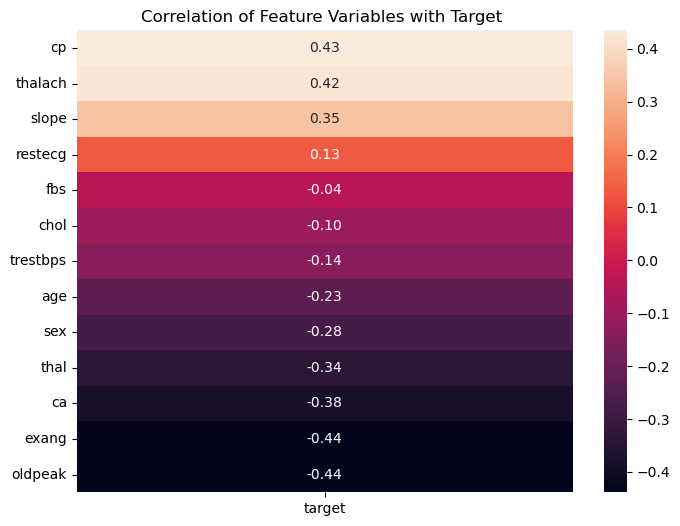

In [2]:
#Statistical analysis
#Check the relation between columns and target
corr = df.corr()['target'].drop('target').sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(corr.to_frame(), annot=True, fmt=".2f", cbar=True)
plt.title("Correlation of Feature Variables with Target ")
plt.yticks(rotation=0)
plt.show()

In [5]:
#Select features with correlation
top_features = corr[abs(corr) > 0.3].index.tolist()
print("Selected features (correlation > 0.3):", top_features)

#Create composite risk index
df['risk_index'] = df['oldpeak']*0.5 + df['slope']*(-0.3) + df['exang']*(-0.2)
selected_features = ['cp', 'thalach', 'ca', 'thal', 'risk_index']
X = df[selected_features]
y = df['target']

Selected features (correlation > 0.3): ['cp', 'thalach', 'slope', 'thal', 'ca', 'exang', 'oldpeak']


In [6]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16,validation_split=0.2, verbose=1)

C:\Users\LENOLO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5594 - loss: 0.6725 - val_accuracy: 0.8333 - val_loss: 0.5151
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8351 - loss: 0.4810 - val_accuracy: 0.8403 - val_loss: 0.4246
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8219 - loss: 0.4473 - val_accuracy: 0.8333 - val_loss: 0.3889
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8127 - loss: 0.4296 - val_accuracy: 0.8403 - val_loss: 0.3772
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8261 - loss: 0.4229 - val_accuracy: 0.8403 - val_loss: 0.3662
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7893 - loss: 0.4298 - val_accuracy: 0.8333 - val_loss: 0.3625
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8484 - loss: 0.3621 - val_accuracy: 0.8542 - val_loss: 0.3520
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8467 - loss: 0.4039 - val_accuracy: 0.8750 - val_los

In [8]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [9]:
print("Evaluation Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Evaluation Metrics:
Accuracy : 0.8603896103896104
Precision: 0.8709677419354839
Recall   : 0.8544303797468354
F1 Score : 0.8626198083067093


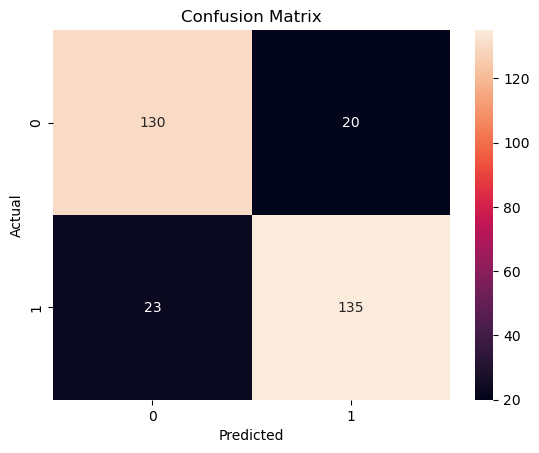

In [10]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
#Save the model fo deployment
model.save("heart_model.keras")
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']